## Import Library dan Import Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import squarify  


In [2]:
df = pd.read_csv(r"C:\Users\Hewlett Packard\Desktop\SAYA\Proyek Retail\online_retail_II.csv")

## Konteks Dataset

Dataset Online Retail II berisi semua transaksi yang terjadi pada sebuah perusahaan retail online berbasis dan terdaftar di Inggris, dalam periode 01 Desember 2009 hingga 09 Desember 2011.
Perusahaan ini terutama menjual produk hadiah unik untuk berbagai kesempatan (all-occasion gift-ware).
Banyak pelanggan perusahaan ini adalah grosir (wholesalers).

### Informasi Atribut Datasset

* InvoiceNo (Nomor Faktur): Nominal. Nomor unik dengan 6 digit untuk setiap transaksi. Jika kodenya diawali huruf 'C', berarti transaksi tersebut adalah pembatalan (cancellation).
* StockCode (Kode Produk): Nominal. Nomor unik dengan 5 digit untuk setiap produk yang berbeda.
* Description (Deskripsi Produk): Nominal. Nama atau deskripsi produk.
* Quantity (Kuantitas): Numerik. Jumlah unit produk yang dibeli pada transaksi tersebut.
* InvoiceDate (Tanggal Faktur): Numerik. Tanggal dan waktu ketika transaksi terjadi.
* UnitPrice (Harga Satuan): Numerik. Harga produk per unit dalam mata uang Pound Sterling (£).
* CustomerID (ID Pelanggan): Nominal. Nomor unik dengan 5 digit yang merepresentasikan setiap pelanggan.
* Country (Negara): Nominal. Nama negara tempat pelanggan berasal atau tinggal. 


### Tujuan Analisis 

Pada kesempatan kali ini kita akan memfokuskan analisis kita pada perilaku konsumen menggunakan metode analisis LRFM

`Length (L)`: Seberapa lama pelanggan sudah bersama kita, dari transaksi pertama sampai terakhir.  
`Recency (R)`: Kapan terakhir kali mereka belanja atau pakai layanan kita.  
`Frequency (F)`: Seberapa sering mereka melakukan transaksi. Semakin sering, semakin loyal.  
`Monetary (M)`: Total uang yang mereka keluarkan. Dari sini kelihatan siapa pelanggan yang paling “berharga” buat bisnis kita.  

Dengan LRFM, kita bisa tahu siapa pelanggan yang aktif, setia, sekaligus paling berkontribusi pada bisnis.

># Data Understanding 

Sebelum kita melakukan analisis mari kita kenali karakteristik dataset lebih lanjut

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
df.describe(include="object")

,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


### Penyesuaian Tipe Data

Dari penjabaran singkat tipe data kita dapati ada beberapa tipe data yang tidak sesuai, oleh karena itu kita akan mengubah tipe data pada kolom tersebut

* `Customer ID` menjadi string
* `InvoiceDate` menjadi datetime




In [7]:
df["Customer ID"] = df["Customer ID"].round().astype("Int64")
df["Customer ID"] = df["Customer ID"].astype("object")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# **Data Cleaning**

Setelah kita kenali karakter dataset berikutnya mari kita cek dan tangani missing value

### Pemeriksaan Missing Value Pada Dataset

In [8]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


Terdapat missing value pada kolom `Description` dan `Customer ID`. Karena analisis berfokus pada LRFM, kolom `Customer ID` sangat krusial. Sayangnya, terdapat 243.007 missing value dari 1.067.371 baris (±25%), sehingga diperlukan penanganan yang hati-hati. 

### Memeriksa Missing Value Pada Customer ID

Mari kita kenali karakteristik data dengan missing value lebih lanjut, harapannya data tersebut masih bisa diisi

In [9]:
df[df["Customer ID"].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,<NA>,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,<NA>,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,<NA>,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,<NA>,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,<NA>,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,<NA>,United Kingdom


Dari pemeriksaan di atas, pada baris-baris yang memiliki missing value pada `Customer ID`, terdapat beberapa poin menarik untuk dieksplorasi lebih lanjut, di antaranya:  

- Kolom `Price` yang memiliki nilai 0, positif, atau bahkan negatif  
- Kolom `Quantity` yang mengandung nilai negatif  
- Deskripsi pada data dengan missing value yang terlihat ditujukan untuk penyesuaian stok  


#### Mengenal Lebih Dekat Kolom Price

#### `Price = 0` ####
Jika kita perhatikan terdapat harga 0, kuantitas negatif, bahkan deskripsi barang yang menyatakan bahwa barang tercampur. Data-data ini bisa langsung kita hapus karena tidak berarti pada analisis kita

In [10]:
df[(df["Customer ID"].isna()) & (df["Price"] == 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,<NA>,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,<NA>,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,<NA>,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,<NA>,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,<NA>,United Kingdom
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,<NA>,United Kingdom
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,<NA>,United Kingdom
1064015,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,<NA>,United Kingdom


#### `Price < 0` ####

In [11]:
df[(df["Customer ID"].isna()) & (df["Price"] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,<NA>,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,<NA>,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,<NA>,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom


#### `Price > 0` ####

In [12]:
df[(df["Customer ID"].isna()) & (df["Price"] > 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,<NA>,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,<NA>,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,<NA>,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,<NA>,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,<NA>,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,<NA>,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,<NA>,United Kingdom


### Menyocokkan Missing Value pada `Customer ID` Sesuai dengan Invoice

Terdapat indikasi bahwa transaksi dengan missing value pada `Customer ID` memiliki keterkaitan dengan invoice yang sama, di mana pada transaksi lain `Customer ID` tercatat dengan lengkap. Apabila kondisi tersebut ditemukan, maka missing value pada `Customer ID` dapat diisi berdasarkan informasi yang tersedia pada transaksi terkait.


In [13]:
# Mengelompokkan invoice yang memiliki missing value pada `Customer ID`
missing_customer_id_invoices = df[df["Customer ID"].isnull()]["Invoice"].unique().tolist()
missing_customer_id_invoices


['489464',
 '489463',
 '489467',
 '489521',
 '489525',
 '489548',
 '489596',
 '489597',
 '489600',
 '489601',
 '489602',
 '489603',
 '489604',
 '489608',
 '489607',
 '489609',
 '489612',
 '489615',
 '489614',
 '489616',
 '489618',
 '489619',
 '489638',
 '489642',
 '489653',
 '489655',
 '489659',
 '489660',
 '489663',
 '489781',
 '489806',
 '489820',
 '489821',
 '489856',
 '489857',
 'C489859',
 'C489860',
 '489861',
 '489867',
 'C489881',
 '489882',
 '489892',
 '489898',
 '489899',
 '489901',
 '489903',
 '490007',
 '490015',
 '490016',
 '490030',
 '490055',
 '490074',
 '490084',
 '490123',
 '490130',
 '490146',
 '490149',
 '490150',
 '490165',
 '490177',
 '490186',
 '490192',
 'C490307',
 '490344',
 '490345',
 '490351',
 '490352',
 '490354',
 '490361',
 '490379',
 '490384',
 '490517',
 '490523',
 '490540',
 '490541',
 '490543',
 '490566',
 '490688',
 '490698',
 '490699',
 '490713',
 '490715',
 '490716',
 '490723',
 '490735',
 '490736',
 '490741',
 '490745',
 '490758',
 '490765',
 '4907

In [14]:
# Memeriksa apakah terdapat invoice yang sama dengan `Customer ID` yang lengkap
overlap = df[df["Customer ID"].isin(missing_customer_id_invoices) & df["Invoice"].notnull()]
overlap


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


Dari pemeriksaan di atas teridentifikasi bahwa tidak terdapat invoice yang sama pada baris-baris yang memiliki missing value pada `Customer ID`. Oleh karena itu, metode imputasi `Customer ID` berdasarkan kecocokan invoice tidak dapat diterapkan pada kasus ini.


### Kesimpulan Penanganan Missing Value
* Kolom `Price` yang bernilai 0 ataupun kurang dari nol tidak dapat dimaknai sebagai transaksi, kolom ini jelas tidak berfungsi dalam analisis ini dan akan dibuang
* Namun, kolom `Price` yang bernilai positif tetap tidak dapat diisi, karena metode pencocokan invoice tidak berhasil mendeteksi adanya kesamaan.
* Oleh karena itu semua baris dengan missing value pada kolom `Customer ID` akan kita hapus.

Pendalaman analisis terhadap missing value pada kolom `Customer ID` dihentikan pada tahap ini, karena dikhawatirkan upaya lebih lanjut hanya akan menghabiskan waktu tanpa memberikan insight yang berarti.



### Penghapusan Missing Value pada Kolom `Customer ID`

In [15]:
# Menghapus baris dengan missing value pada `Customer ID`
df = df.dropna(subset=["Customer ID"])

In [16]:
df["Customer ID"]

0          13085
1          13085
2          13085
3          13085
4          13085
           ...  
1067366    12680
1067367    12680
1067368    12680
1067369    12680
1067370    12680
Name: Customer ID, Length: 824364, dtype: object

# **Analisis LRFM**

Setelah data siap selanjutnya kita akan langsung memulai analisis LRFM dengan langkah-langkah sebagai berikut
1. Menghitung masing-masing LRFM
2. Memberi skor sesuai data LRFM
3. Memberi label pada tiap customer


## 1. Menghitung LRFM

### `Length dan Recency`

Untuk menghitung recency dan length diperlukan data waktu pertama transaksi dan data terakhir transaksi. Sedangkan waktu yang menjadi patokan adalah waktu analisis, dalam hal ini kita asumsikan 30 hari setelah data terakhir.

In [17]:
waktu_analisis = df["InvoiceDate"].max() + datetime.timedelta(30)
waktu_analisis

Timestamp('2012-01-08 12:50:00')

Selanjutnya kita akan menghitung recency dan length tiap customer dan menyimpannya dalam dataframe

In [18]:
df_length_dan_recency = df.groupby("Customer ID").agg(
   length = ("InvoiceDate", lambda x: (waktu_analisis - x.min()).days),
   recency = ("InvoiceDate", lambda x: (waktu_analisis - x.max()).days)
)
df_length_dan_recency.sample(5, random_state=26)

,length,recency
Customer ID,,
17857,671,32
15443,672,31
12993,689,52
17591,720,102
16565,585,393


Dari dataframe di atas, dapat disimpulkan bahwa:  

- Customer dengan ID `17591` adalah customer yang paling lama membangun hubungan dengan perusahaan (**720 hari yang lalu**).  
- Customer dengan ID `15443` adalah customer yang paling baru melakukan transaksi (**31 hari yang lalu**).


### `Frequency`

Untuk mengetahui seberapa banyak customer melakukan transaksi kita bisa menggunakan data unik transaksi dalam hal ini kolom `invoice`

In [19]:
df_frequency = df.groupby("Customer ID").agg(
   frequency = ("Invoice", "nunique")
)
df_frequency.sample(5, random_state=26)

,frequency
Customer ID,
17857,26
15443,16
12993,10
17591,9
16565,5


Dari dataframe di atas kita ketahui bahwa:

* Customer dengan ID `17857` adalah customer yang paling banyak melakukan transaksi (**26 Kali**)

### `Monetary`

Total transaksi customer bisa kita dapati dengan mengitung barang yang dibeli dan menjumlahkan seluruhnya. Kali ini kita akan menmbuat kolom `TotalPrice` yaitu `Quantity` * `Price` pada dataframe utama kemudian mengagregasi penghitungan tersebut pada dataframe baru

In [20]:
df["TotalPrice"] = df["Quantity"] * df["Price"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [21]:
df_monetary = df.groupby("Customer ID").agg(
   monetary = ("TotalPrice", "sum")
)
df_monetary.sample(5, random_state=26)

,monetary
Customer ID,
17857,28566.54
15443,5116.14
12993,1191.26
17591,2765.72
16565,700.45


Dari dataframe di atas kita dapati bahwa:

* Customer dengan ID `17857` adalah customer dengan total transaksi terbesar (**28566.54 Pound**)

hal ini cukup wajar mengingat customer tersebut adalah customer yang paling banyak melakukan transaksi

###  Menggabungkan Seluruh Dataframe

In [22]:
df_lrfm = df_length_dan_recency.merge(df_frequency, on="Customer ID").merge(df_monetary, on="Customer ID")
df_lrfm.sample(5, random_state=26)

,length,recency,frequency,monetary
Customer ID,,,,
17857,671,32,26,28566.54
15443,672,31,16,5116.14
12993,689,52,10,1191.26
17591,720,102,9,2765.72
16565,585,393,5,700.45


Dengan penggabungan ini selesai sudah tahap penghitungan LRFM

## 2. Pemberian Skor

Setelah mendapatkan data **LRFM**, langkah berikutnya adalah memberikan **skor** pada setiap customer untuk masing-masing dimensinya. Karena tidak ada permintaan spesifik, pada kesempatan kali ini kita akan menggunakan **pendekatan statistik**, yaitu dengan membagi distribusi data berdasarkan **quantile**.

### `Length` Scoring

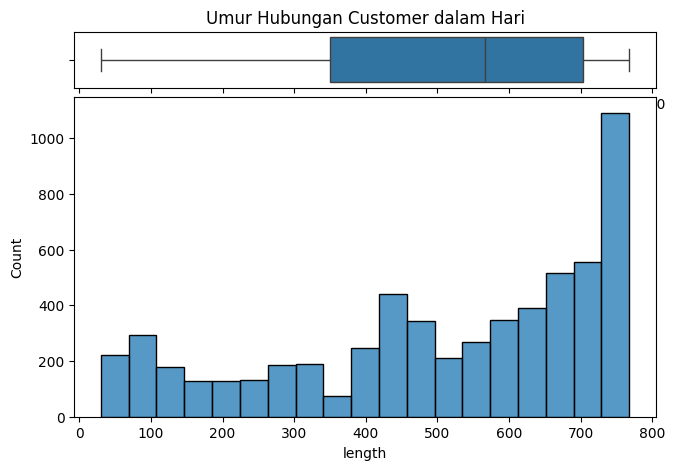

0.00     30.00
0.25    349.75
0.50    566.00
0.75    703.00
1.00    768.00
Name: length, dtype: float64

In [23]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_lrfm, x='length', ax=ax_top)
sns.histplot(data=df_lrfm, x='length', ax=ax_bot)

ax_top.set(
    title='Umur Hubungan Customer dalam Hari'
)

plt.show()
display(df_lrfm['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan visualisasi di atas kita akan mengelompokkan customer menjadi 4 kelompok dengan skor sebagai berikut:

1 (newcomer), pendatang baru yang melakukan transaksi sejak 30 - 350 hari yang lalu  
2 (acquainted), customer yang melakukan transaksi sejak 350 - 566 hati yang lalu  
3 (established), customer lama yang melakukan transaksi sejak 566 - 703 hari yang lalu  
4 (veteran), customer yang melakukan transaksi sejak lebih dari 703 hari yang lalu  

In [24]:
df_lrfm['l_score'] = pd.qcut(
    df_lrfm['length'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk length: semakin lama, maka semakin besar skornya
).astype(int)

df_lrfm.sample(5, random_state=26)

,length,recency,frequency,monetary,l_score
Customer ID,,,,,
17857,671,32,26,28566.54,3
15443,672,31,16,5116.14,3
12993,689,52,10,1191.26,3
17591,720,102,9,2765.72,4
16565,585,393,5,700.45,3


### `Recency` Scoring

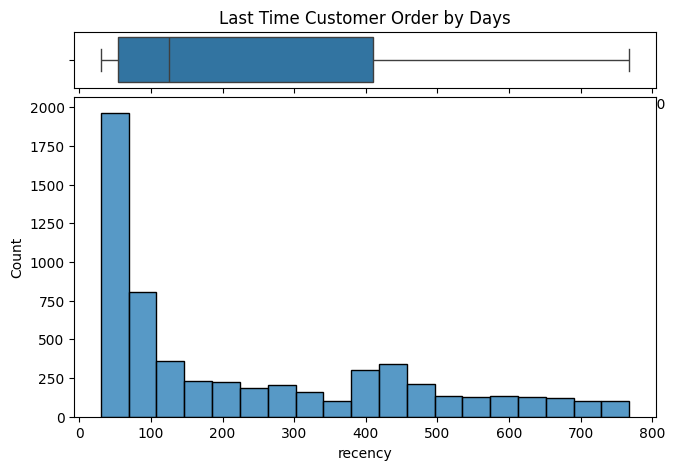

0.00     30.0
0.25     54.0
0.50    125.0
0.75    410.0
1.00    768.0
Name: recency, dtype: float64

In [25]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_lrfm, x='recency', ax=ax_top)
sns.histplot(data=df_lrfm, x='recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df_lrfm['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Dari histogram di atas kita dapatkan distribusi hari terakhir customer melakukan transaksi yang dapat kita kelompokkan sebagai berikut:

1 (inactive), customer yang melakukan transaksi terakhir lebih dari 410 hari yang lalu  
2 (cold), customer yang melakukan transaksi terakhir 125 - 410 hari yang lalu  
3 (warm), customer yang melakukan transaksi terakhir 54 - 125 hari yang lalu  
4 (active), customer yang melakukan transaksi terakhir 30 - 54 hari yang lalu  

In [26]:
df_lrfm['r_score'] = pd.qcut(
    df_lrfm['recency'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[4, 3, 2, 1]                 # pelabelan, untuk recency: semakin lama, maka semakin kecil skornya
).astype(int)

df_lrfm.sample(5, random_state=26)

,length,recency,frequency,monetary,l_score,r_score
Customer ID,,,,,,
17857,671,32,26,28566.54,3,4
15443,672,31,16,5116.14,3,4
12993,689,52,10,1191.26,3,4
17591,720,102,9,2765.72,4,3
16565,585,393,5,700.45,3,2


### `Frequency` Scoring

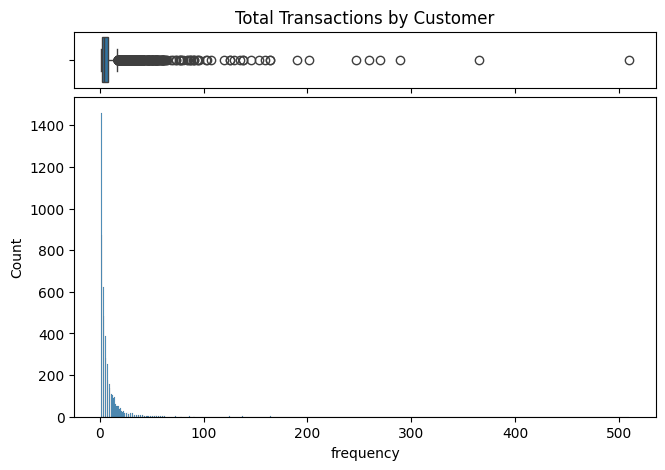

0.00      1.0
0.25      2.0
0.50      4.0
0.75      8.0
1.00    510.0
Name: frequency, dtype: float64

In [27]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_lrfm, x='frequency', ax=ax_top)
sns.histplot(data=df_lrfm, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_lrfm['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas pemberian skor bisa dikelompokkan sebagai berikut:

1 (low), customer yang hanya melakukan 1 - 2 kali transaksi  
2 (medium), customer yang melakukan 3 - 4 kali transaksi  
3 (high), customer yang melakukan 5 - 8 kali transaksi  
4 (loyal), customer yang melakukan lebih dari 8 transaksi

In [28]:
df_lrfm['f_score'] = pd.qcut(
    df_lrfm['frequency'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk frequency: semakin sering, maka semakin besar skornya
).astype(int)

df_lrfm.sample(5, random_state=26)

,length,recency,frequency,monetary,l_score,r_score,f_score
Customer ID,,,,,,,
17857,671,32,26,28566.54,3,4,4
15443,672,31,16,5116.14,3,4,4
12993,689,52,10,1191.26,3,4,4
17591,720,102,9,2765.72,4,3,4
16565,585,393,5,700.45,3,2,3


### `Monetary` Scoring

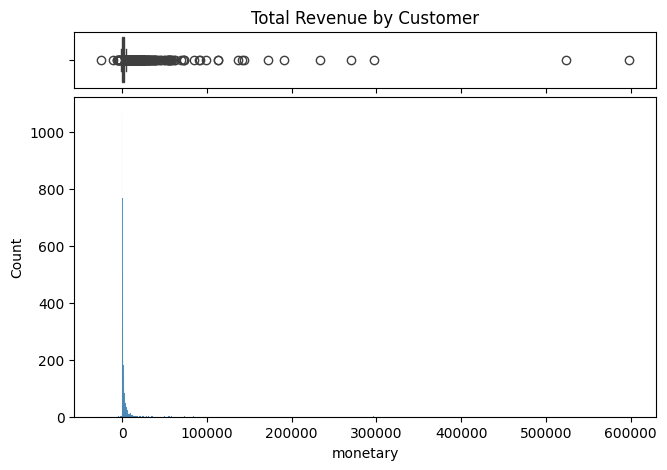

0.00    -25111.0900
0.25       325.0975
0.50       843.9700
0.75      2182.0050
1.00    598215.2200
Name: monetary, dtype: float64

In [29]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_lrfm, x='monetary', ax=ax_top)
sns.histplot(data=df_lrfm, x='monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()
display(df_lrfm['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Dari distribusi di atas kita dapati customer dalam kelompok dengan skor sebagai berikut:

1 (low spender), customer yang melakukan transaksi kurang dari 325 pound  
2 (medium spender), cuntomer yang melakukan transaksi antara 325 - 843 pound  
3 (high spender), customer yang melakukan transaksi antara 843 - 2182 pound  
4 (top spender), customer yang melakukan transaksi lebih dari 2182 pund

In [30]:
df_lrfm['m_score'] = pd.qcut(
    df_lrfm['monetary'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar transaksi, maka semakin besar skornya
).astype(int)

df_lrfm.sample(5, random_state=26)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
Customer ID,,,,,,,,
17857,671,32,26,28566.54,3,4,4,4
15443,672,31,16,5116.14,3,4,4,4
12993,689,52,10,1191.26,3,4,4,3
17591,720,102,9,2765.72,4,3,4,4
16565,585,393,5,700.45,3,2,3,2


## 3. Labelling Customer (Combining Individual Score Approach)

Sebelumnya, kita sudah mendapatkan masing-masing **LRFM score** dari tiap customer. Selanjutnya, berdasarkan kombinasi nilai-nilai tersebut, kita akan memberikan **labelling** pada customer. Kali ini kita akan menggunakan Combining Individual Score Approach atau pendekatan kombinasi skor tiap individu. Dengan metode ini, perilaku customer dapat terlihat lebih jelas, karena proses **labelling customer** mempertimbangkan setiap skor pada dimensi **LRFM** secara terpisah.  
Contoh:  
- Customer dengan skor **R tinggi** tapi **F rendah** → kemungkinan customer baru yang belum sering bertransaksi.  
- Customer dengan skor **F tinggi** dan **M tinggi** → customer setia sekaligus bernilai tinggi bagi perusahaan.  
- Customer dengan skor **L rendah** tapi **R rendah** → customer lama yang sudah jarang melakukan transaksi (berisiko churn).


In [31]:
df_lrfm['lrfm_score_combined'] = df_lrfm['l_score'].astype(str) + df_lrfm['r_score'].astype(str) + df_lrfm['f_score'].astype(str) + df_lrfm['m_score'].astype(str)
df_lrfm.sample(5, random_state=26)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined
Customer ID,,,,,,,,,
17857,671,32,26,28566.54,3,4,4,4,3444
15443,672,31,16,5116.14,3,4,4,4,3444
12993,689,52,10,1191.26,3,4,4,3,3443
17591,720,102,9,2765.72,4,3,4,4,4344
16565,585,393,5,700.45,3,2,3,2,3232


Selanjutnya kita akan mengelompokkan sesuai rangkaian skor yang kita dapatkan

In [32]:
seg_map = {
    r'[1-2][1-4][1-4][1-2]': 'New Cust Low Value',
    r'[1-2][1-4][1-4][3-4]': 'New Cust High Value',
    r'[3-4][1-2][1-2][1-2]': 'Old Cust Inactive',
    r'[3-4][1-2][1-4][1-4]': 'At Risk', 
    r'[3-4][1-2][3-4][3-4]': 'Need Attention',
    r'[1-4][2-4][1-2][3-4]': 'Big Spender',
    r'[3-4][3-4][3-4][3-4]': 'Loyal Cust',
    r'[3-4][3-4][3-4][1-2]': 'Potential Loyal Cust',
    r'[3-4][3-4][1-2][1-4]': 'Reactivated Old Cust',
}

df_lrfm['lrfm_segment_combined'] = df_lrfm['lrfm_score_combined'].replace(seg_map, regex=True)
df_lrfm.sample(5, random_state=26)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined
Customer ID,,,,,,,,,,
17857,671,32,26,28566.54,3,4,4,4,3444,Loyal Cust
15443,672,31,16,5116.14,3,4,4,4,3444,Loyal Cust
12993,689,52,10,1191.26,3,4,4,3,3443,Loyal Cust
17591,720,102,9,2765.72,4,3,4,4,4344,Loyal Cust
16565,585,393,5,700.45,3,2,3,2,3232,At Risk


## 4. Interpretasi dan Analisis Segmentasi Secara Menyeluruh

Setelah proses segmentasi selesai, kita akan memulai tahap **interpretasi dan analisis**. Bagian ini akan difokuskan pada hasil segmentasi yang telah kita peroleh sebelumnya, dengan tujuan untuk memahami **karakteristik tiap segmen customer** serta **implikasinya bagi strategi bisnis**.

### Statistik Segmentasi

In [33]:
lrfm_Stats = df_lrfm[["lrfm_segment_combined","length","recency","frequency", "monetary"]].groupby("lrfm_segment_combined").agg(["mean","median","count", "std"])
lrfm_Stats.columns = lrfm_Stats.columns.map('_'.join).str.strip('|')
lrfm_Stats

,length_mean,length_median,length_count,length_std,recency_mean,recency_median,recency_count,recency_std,frequency_mean,frequency_median,frequency_count,frequency_std,monetary_mean,monetary_median,monetary_count,monetary_std
lrfm_segment_combined,,,,,,,,,,,,,,,,
At Risk,693.990921,702.0,771,59.939178,331.254215,310.0,771,151.363226,7.900130,6.0,771,8.571874,2506.152746,1522.790,771,4315.834226
Big Spender,665.555556,655.5,54,63.335485,81.907407,79.5,54,26.543143,3.629630,4.0,54,0.592287,1522.963148,1224.330,54,878.325687
Loyal Cust,712.586735,730.0,1176,57.034571,58.142007,51.0,1176,25.610990,21.443878,14.0,1176,30.401908,9044.846784,4113.655,1176,29080.313792
New Cust High Value,357.457865,417.0,1068,152.114977,111.918539,60.0,1068,117.324348,7.150749,5.0,1068,6.916067,2869.444617,1599.105,1068,9048.779729
New Cust Low Value,301.264814,318.0,1907,166.668053,233.416361,199.0,1907,168.384278,1.906660,1.0,1907,1.261544,351.588653,322.930,1907,237.446655
Old Cust Inactive,673.962919,671.5,836,61.632811,569.996411,611.0,836,156.945824,1.832536,2.0,836,0.980379,229.434451,283.580,836,1061.953131
Potential Loyal Cust,693.547619,702.5,42,64.533675,63.000000,52.0,42,27.042875,6.785714,6.0,42,2.311537,557.883095,626.895,42,247.632670
Reactivated Old Cust,667.829545,656.5,88,63.119158,68.056818,65.5,88,22.969424,3.193182,3.0,88,0.755941,531.637386,534.920,88,195.476374


In [34]:
lrfm_Stats["monetary_mean_per_transaction"] = lrfm_Stats["monetary_median"] / lrfm_Stats["frequency_median"]
lrfm_Stats

,length_mean,length_median,length_count,length_std,recency_mean,recency_median,recency_count,recency_std,frequency_mean,frequency_median,frequency_count,frequency_std,monetary_mean,monetary_median,monetary_count,monetary_std,monetary_mean_per_transaction
lrfm_segment_combined,,,,,,,,,,,,,,,,,
At Risk,693.990921,702.0,771,59.939178,331.254215,310.0,771,151.363226,7.900130,6.0,771,8.571874,2506.152746,1522.790,771,4315.834226,253.798333
Big Spender,665.555556,655.5,54,63.335485,81.907407,79.5,54,26.543143,3.629630,4.0,54,0.592287,1522.963148,1224.330,54,878.325687,306.082500
Loyal Cust,712.586735,730.0,1176,57.034571,58.142007,51.0,1176,25.610990,21.443878,14.0,1176,30.401908,9044.846784,4113.655,1176,29080.313792,293.832500
New Cust High Value,357.457865,417.0,1068,152.114977,111.918539,60.0,1068,117.324348,7.150749,5.0,1068,6.916067,2869.444617,1599.105,1068,9048.779729,319.821000
New Cust Low Value,301.264814,318.0,1907,166.668053,233.416361,199.0,1907,168.384278,1.906660,1.0,1907,1.261544,351.588653,322.930,1907,237.446655,322.930000
Old Cust Inactive,673.962919,671.5,836,61.632811,569.996411,611.0,836,156.945824,1.832536,2.0,836,0.980379,229.434451,283.580,836,1061.953131,141.790000
Potential Loyal Cust,693.547619,702.5,42,64.533675,63.000000,52.0,42,27.042875,6.785714,6.0,42,2.311537,557.883095,626.895,42,247.632670,104.482500
Reactivated Old Cust,667.829545,656.5,88,63.119158,68.056818,65.5,88,22.969424,3.193182,3.0,88,0.755941,531.637386,534.920,88,195.476374,178.306667


In [35]:
lrfm_Stats["median_of_spending_ratios"] = df_lrfm.groupby("lrfm_segment_combined").apply(lambda x: (x["monetary"] / x["frequency"]).median())
lrfm_Stats

C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_11888\1260868581.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lrfm_Stats["median_of_spending_ratios"] = df_lrfm.groupby("lrfm_segment_combined").apply(lambda x: (x["monetary"] / x["frequency"]).median())


,length_mean,length_median,length_count,length_std,recency_mean,recency_median,recency_count,recency_std,frequency_mean,frequency_median,frequency_count,frequency_std,monetary_mean,monetary_median,monetary_count,monetary_std,monetary_mean_per_transaction,median_of_spending_ratios
lrfm_segment_combined,,,,,,,,,,,,,,,,,,
At Risk,693.990921,702.0,771,59.939178,331.254215,310.0,771,151.363226,7.900130,6.0,771,8.571874,2506.152746,1522.790,771,4315.834226,253.798333,275.781667
Big Spender,665.555556,655.5,54,63.335485,81.907407,79.5,54,26.543143,3.629630,4.0,54,0.592287,1522.963148,1224.330,54,878.325687,306.082500,362.517500
Loyal Cust,712.586735,730.0,1176,57.034571,58.142007,51.0,1176,25.610990,21.443878,14.0,1176,30.401908,9044.846784,4113.655,1176,29080.313792,293.832500,280.865722
New Cust High Value,357.457865,417.0,1068,152.114977,111.918539,60.0,1068,117.324348,7.150749,5.0,1068,6.916067,2869.444617,1599.105,1068,9048.779729,319.821000,327.143750
New Cust Low Value,301.264814,318.0,1907,166.668053,233.416361,199.0,1907,168.384278,1.906660,1.0,1907,1.261544,351.588653,322.930,1907,237.446655,322.930000,184.660000
Old Cust Inactive,673.962919,671.5,836,61.632811,569.996411,611.0,836,156.945824,1.832536,2.0,836,0.980379,229.434451,283.580,836,1061.953131,141.790000,162.481250
Potential Loyal Cust,693.547619,702.5,42,64.533675,63.000000,52.0,42,27.042875,6.785714,6.0,42,2.311537,557.883095,626.895,42,247.632670,104.482500,83.638000
Reactivated Old Cust,667.829545,656.5,88,63.119158,68.056818,65.5,88,22.969424,3.193182,3.0,88,0.755941,531.637386,534.920,88,195.476374,178.306667,165.547500


Dari seluruh segmentasi customer, berikut adalah gambaran besar statistiknya. Untuk memudahkan interpretasi, mari kita lanjutkan ke bagian **visualisasi data**.


### Visualisasi Data

### Boxplot Setiap Dimensi LRFM untuk Seluruh Segmen Pelanggan

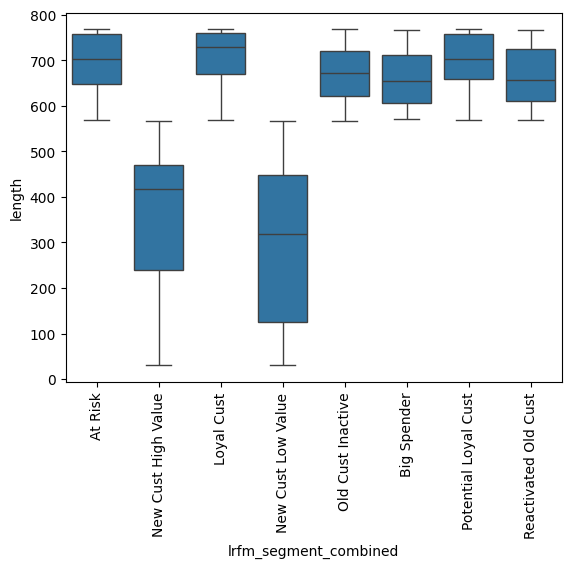

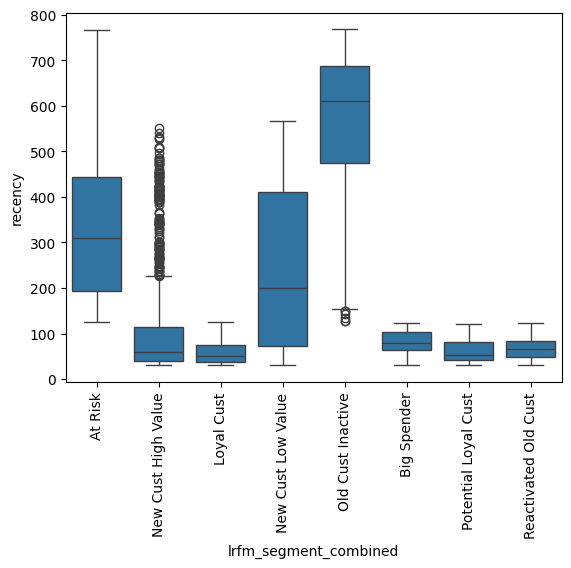

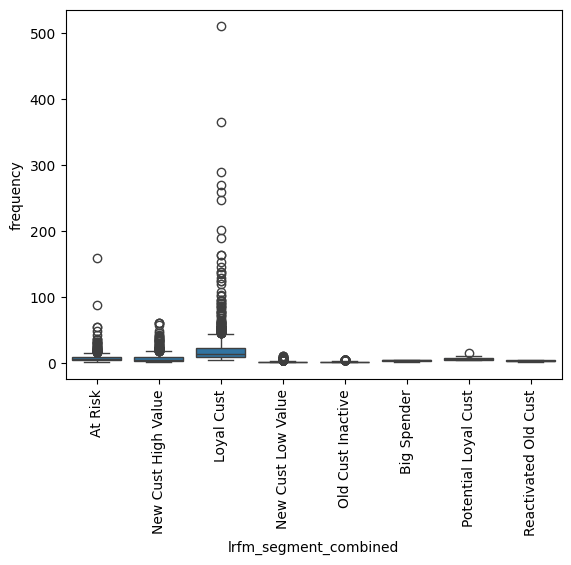

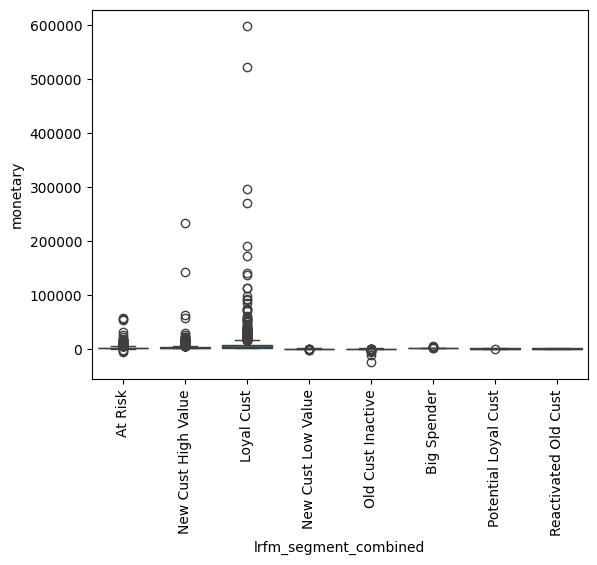

In [36]:
lrfm = ["length", "recency", "frequency", "monetary"]
for i in lrfm:
    sns.boxplot(data=df_lrfm, x='lrfm_segment_combined', y=i)
    plt.xticks(rotation=90)
    plt.show()

### a. Heatmap statistik data berdasarkan median

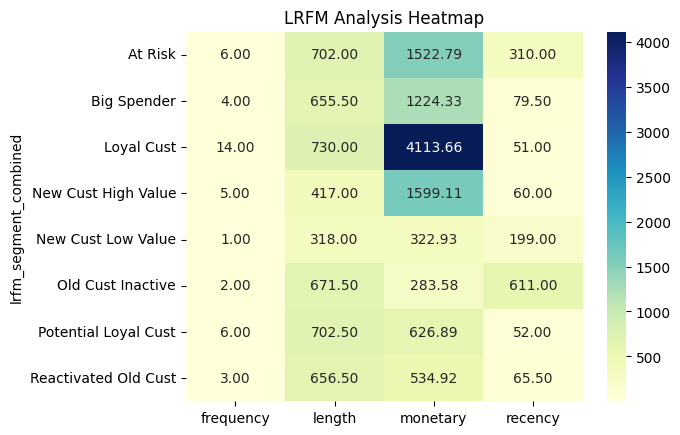

In [37]:
lrfm_heatmap = df_lrfm.pivot_table(index='lrfm_segment_combined', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

Berdasarkan heatmap di atas berikut gambaran perilaku tiap segmen customer:

- **At Risk**: Memiliki *frequency*, *length*, dan *monetary* yang baik, namun *recency* tinggi menempatkan mereka di segmen ini. Segmen ini perlu ditinjau lebih lanjut untuk strategi retensi.
- **Big Spender**: *Frequency* tidak terlalu tinggi, tetapi *monetary* cukup besar. Perlu dicermati untuk peluang upselling, meski nilainya tidak terlalu fantastis dibanding segmen lain.
- **Loyal Cust**: Semua dimensi LRFM tinggi. Merupakan customer paling berharga, dan jumlahnya menjadi indikator baiknya kinerja perusahaan.
- **New Cust High Value**: Pelanggan baru dengan nilai tinggi. Perlu perhatian khusus untuk menjaga retensi dan mendorong loyalitas.
- **New Cust Low Value**: Segmen yang memerlukan pengawasan jangka panjang. Sulit menentukan strategi langsung, tetapi mereka berpotensi menjadi **Old Cust Inactive**.
- **Old Cust Inactive**: Customer lama yang tidak kembali bertransaksi. Mengingat *monetary* rendah, tidak memerlukan strategi khusus.
- **Potential Loyal Cust**: *Monetary* rendah, namun *length* dan *frequency* tinggi, dan *recency* rendah. Menjaga kualitas layanan sudah cukup; strategi khusus dapat fokus meningkatkan *monetary*.
- **Reactivated Old Cust**: Customer lama yang kembali aktif. Tidak terlalu berharga untuk strategi khusus, tetapi bisa menjadi indikasi keberhasilan strategi sebelumnya.

> Catatan: Karakteristik segmen ini masih bersifat awal; keputusan strategi lebih matang sebaiknya dibuat setelah meninjau visualisasi lainnya, terutama distribusi data.


### b. Distribusi data

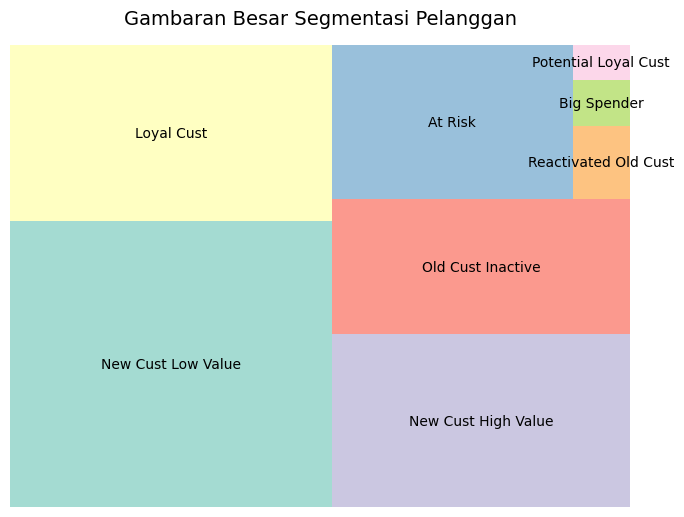

In [38]:
# Data segmentasi pelanggan
segment = df_lrfm['lrfm_segment_combined'].value_counts().index
segment_count = df_lrfm['lrfm_segment_combined'].value_counts().values

# Buat treemap
plt.figure(figsize=(8,6))
squarify.plot(
    sizes=segment_count, 
    label=segment, 
    alpha=0.8, 
    color=plt.cm.Set3.colors[:len(segment)],
    text_kwargs={'fontsize':10}
)
plt.title("Gambaran Besar Segmentasi Pelanggan", fontsize=14, pad=15)
plt.axis('off')
plt.show()


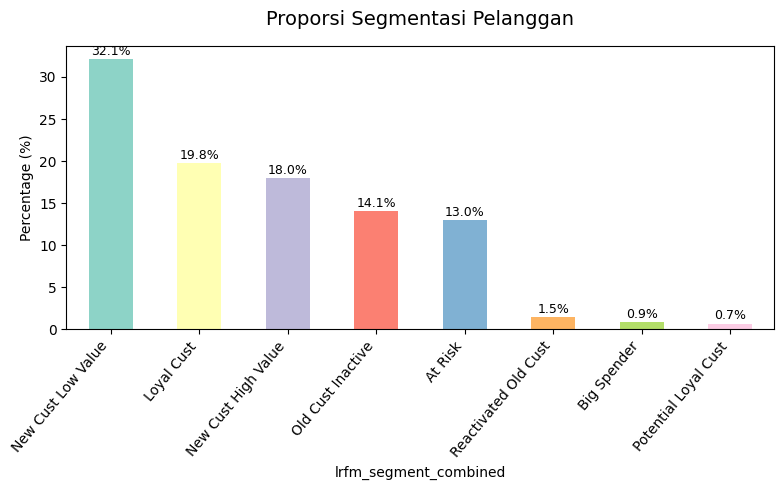

In [39]:
import matplotlib.pyplot as plt

# ambil nilai
values = df_lrfm['lrfm_segment_combined'].value_counts()
share = values / values.sum() * 100   # hitung proporsi %

# plot bar chart
ax = share.plot(kind="bar", color=plt.cm.Set3.colors[:len(values)], figsize=(8,5))

# kasih label persen di atas bar
for i, v in enumerate(share):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=9)

plt.ylabel("Percentage (%)")
plt.title("Proporsi Segmentasi Pelanggan", fontsize=14, pad=15)
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.show()


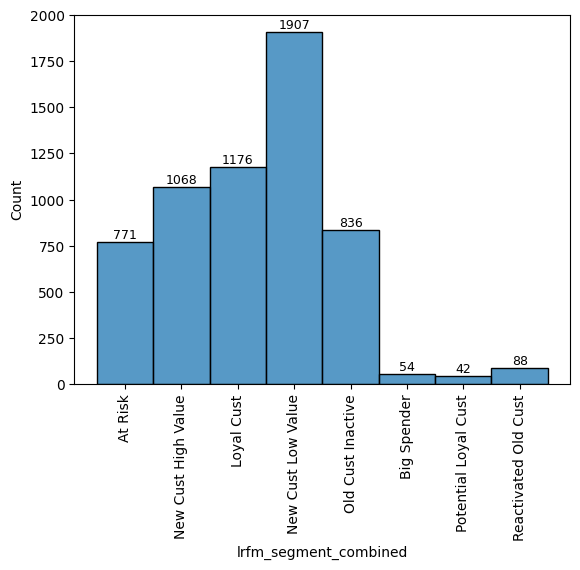

In [40]:
ax = sns.histplot(data=df_lrfm, x='lrfm_segment_combined', bins=30)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)
plt.show()


Berdasarkan histogram di atas, dapat disimpulkan bahwa:  

- Customer didominasi oleh segmen **New Cust Low Value**.  
  Segmen ini belum menjadi fokus utama, mengingat keberlanjutannya masih belum pasti.  
  Customer pada segmen ini berpotensi berkembang menjadi **Loyal** maupun beralih ke **Old Cust Inactive**.  

- Posisi kedua ditempati oleh segmen **Loyal Cust**.  
  Untuk menjaga segmen ini, program khusus pelanggan loyal dan konsistensi kualitas layanan sudah cukup efektif dalam mempertahankan mereka.  

- Posisi ketiga ditempati oleh segmen **New Cust High Value**, yang jumlahnya tidak jauh berbeda dengan segmen Loyal.  
  Pelanggan baru dengan nilai tinggi ini perlu dijaga, bahkan ditingkatkan, melalui strategi retensi yang tepat.

- Segmen customer **At Risk**, meskipun jumlahnya tidak menandingi **New Cust High Value** dan **Loyal Cust** value customer pada segmen ini cukup besar.
  Merumuskan strategi khusus agar customer ini tidak beralih ke kompetitor bisa dipertimbangkan

- Customer dalam segmen **Old Cust Inactive** jumlahnya masih belum menyaingi 3 segmen customer aktif, meskipun begitu pertumbuhannya perlu diawasi.
- Jumlah yang sedikit pada **Big Spender** belum membuat perlu mengambil perlakukan khusus.
- Segmen **Potential Loyal Cust** bisa kita beri perlakukan yang sama seperti **New Cust High Value** mengingat jumlahnya masih sangat sedikit
- Sedikitnya jumlah Reactivated Old Cust mengindikasikan bahwa strategi dalam menarik kembali pelanggan lama masih kurang efektif. Namun, angka ini tetap dapat dijadikan indikator keberhasilan apabila strategi retensi atau reaktivasi dapat berjalan lebih optimal di masa mendatang.  

Secara keseluruhan, ketiga besar segmen masih didominasi oleh 3 segmen customer aktif, hal ini menunjukkan bahwa strategi perusahaan masih berjalan dengan baik.


Bila kita perhatikan 

In [41]:
import plotly.express as px

color_map = {
    'Loyal Cust' : 'gray',
    'Potensial Loyal Cust' : 'purple',
    'New Cust High Value' : 'pink',
    'New Cust Low Value' : 'blue',
    'Need Attention' : 'green',
    'At Risk' : 'yellow', 
    'Reactivated Old Cust' : 'orange', 
    'Old Cust Inactive' : 'red',
}

fig = px.scatter_3d(
    df_lrfm, 
    x='recency', 
    y='frequency', 
    z='monetary',
    color='lrfm_segment_combined', 
    color_discrete_map=color_map, 
)
                          
fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

## Analisis Nilai Customer Berdasarkan Spending

Sebelumnya kita telah melihat perilaku customer secara keseluruhan, kali ini kita akan melihat value customer secara berdasarkan angka transaksi mereka

### a. Total Transaksi

In [42]:
# Menjumlahkan total transaksi berdasarkan segmen pelanggan
df_monetary_by_segment = df_lrfm.groupby("lrfm_segment_combined").agg(
    monetary_sum=('monetary', 'sum'))
df_monetary_by_segment

,monetary_sum
lrfm_segment_combined,
At Risk,1.932244e+06
Big Spender,8.224001e+04
Loyal Cust,1.063674e+07
New Cust High Value,3.064567e+06
New Cust Low Value,6.704796e+05
Old Cust Inactive,1.918072e+05
Potential Loyal Cust,2.343109e+04
Reactivated Old Cust,4.678409e+04


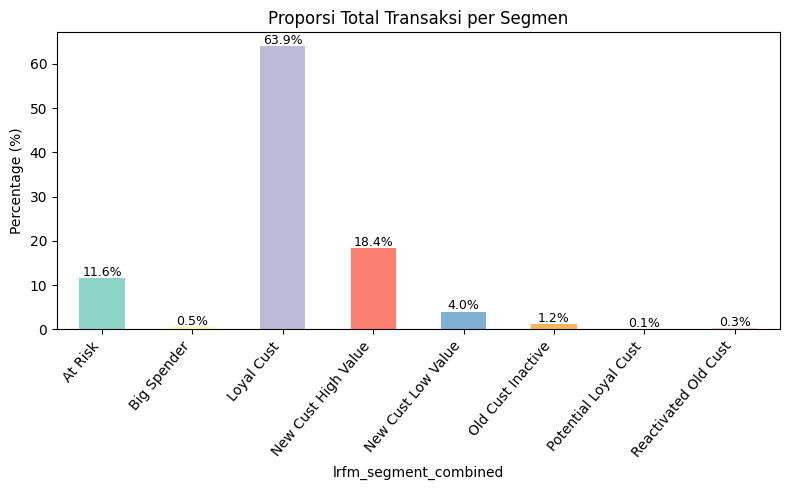

In [43]:
# ambil nilai
values = df_monetary_by_segment['monetary_sum']
share = values / values.sum() * 100   # hitung proporsi %

# plot bar chart
ax = share.plot(kind="bar", color=plt.cm.Set3.colors[:len(values)], figsize=(8,5))

# kasih label persen di atas bar
for i, v in enumerate(share):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=9)

plt.ylabel("Percentage (%)")
plt.title("Proporsi Total Transaksi per Segmen")
plt.xticks(rotation=50, ha="right")
plt.tight_layout()
plt.show()


Berdasarkan barplot di atas, dapat disimpulkan bahwa total transaksi didominasi oleh segmen **Loyal Cust** dengan proporsi sebesar 63,9%.  
Disusul oleh **New Cust High Value** (18,4%) dan **At Risk** (11,6%). Hal ini menjadi indikator positif bagi kinerja perusahaan.  

Perlu dicatat bahwa tingginya proporsi **Loyal Cust** dipengaruhi oleh frekuensi transaksi mereka yang jauh lebih tinggi dibanding customer lainnya.  
Oleh karena itu, untuk memahami nilai customer berdasarkan spending secara lebih akurat, perlu dilihat **median spending per transaksi** pada masing-masing segmen.


### b. Spending per Transaksi

In [44]:
df_lrfm["monetary_per_transaction"] = df_lrfm["monetary"] / df_lrfm["frequency"]
df_lrfm

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_combined,lrfm_segment_combined,monetary_per_transaction
Customer ID,,,,,,,,,,,
12346,755,355,17,-64.68,4,2,4,1,4241,At Risk,-3.804706
12347,433,31,8,5633.32,2,4,3,4,2434,New Cust High Value,704.165000
12348,467,104,5,2019.40,2,3,3,3,2333,New Cust High Value,403.880000
12349,765,48,5,4404.54,4,4,3,4,4434,Loyal Cust,880.908000
12350,339,339,1,334.40,1,2,1,2,1212,New Cust Low Value,334.400000
...,...,...,...,...,...,...,...,...,...,...,...
18283,687,33,22,2736.65,3,4,4,4,3444,Loyal Cust,124.393182
18284,461,459,2,436.68,2,1,1,2,2112,New Cust Low Value,218.340000
18285,690,690,1,427.00,3,1,1,2,3112,Old Cust Inactive,427.000000


Dikarenakan oleh distribusi data yang tidak normal median diambil sebagai pusat data

In [45]:
# Menghitung median monetary per transaction berdasarkan segmen pelanggan
df_monetary_per_transaction_by_segment = df_lrfm.groupby("lrfm_segment_combined").agg(
    monetary_per_transaction_median=('monetary_per_transaction', 'median'))
df_monetary_per_transaction_by_segment

,monetary_per_transaction_median
lrfm_segment_combined,
At Risk,275.781667
Big Spender,362.517500
Loyal Cust,280.865722
New Cust High Value,327.143750
New Cust Low Value,184.660000
Old Cust Inactive,162.481250
Potential Loyal Cust,83.638000
Reactivated Old Cust,165.547500


C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_11888\136224172.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




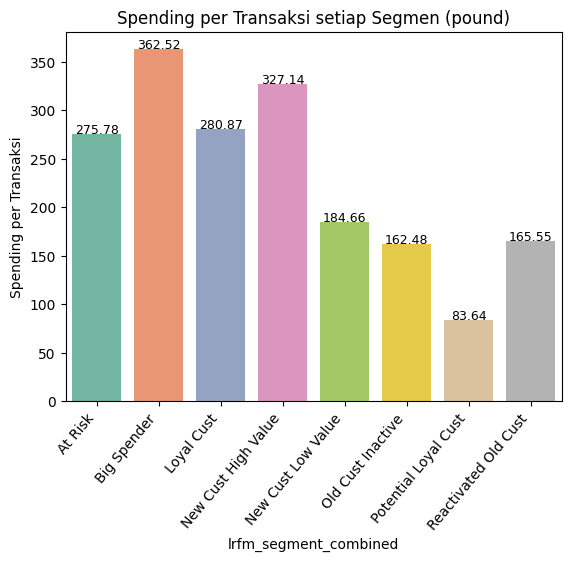

In [46]:
ax = sns.barplot(
    data=df_monetary_per_transaction_by_segment.reset_index(), 
    x='lrfm_segment_combined', 
    y='monetary_per_transaction_median', 
    palette='Set2'
)
for i, v in enumerate(df_monetary_per_transaction_by_segment['monetary_per_transaction_median']):
    ax.text(i, v + 0.5, f"{v:.2f}", ha="center", fontsize=9)
plt.ylabel("Spending per Transaksi")
plt.title("Spending per Transaksi setiap Segmen (pound)")
plt.xticks(rotation=50, ha="right")
plt.show()

Di atas ditampilkan kecenderungan pengeluaran customer pada satu kali transaksi dari setiap segmen.  
Beberapa hal menarik yang dapat kita amati:  

- **Big Spender** menempati posisi pertama dengan rata-rata spending sebesar **362,52 pound**.  
- Di posisi kedua terdapat **New Cust High Value** dengan **327,14 pound**.  
- Posisi ketiga ditempati oleh **Loyal Cust** dengan **280,87 pound**, dan tidak jauh di belakangnya **At Risk** dengan **275,78 pound**.  

Tingginya spending per transaksi pada segmen **Big Spender** bukanlah hal yang mengejutkan. Namun, jumlah customer yang sedikit dan frekuensi transaksi yang rendah membuat mereka bukan prioritas utama. Sebaliknya, tingginya spending per transaksi pada **New Cust High Value** menegaskan perlunya strategi khusus untuk mempertahankan dan meningkatkan loyalitas mereka. Sementara itu, posisi **At Risk** yang hampir setara dengan **Loyal Cust** menunjukkan potensi besar jika mereka dapat ditarik kembali. Mengingat segmen ini sebelumnya memiliki frekuensi transaksi yang cukup tinggi, strategi reaktivasi dapat menjadi langkah penting untuk memaksimalkan keuntungan perusahaan.


# **Summary, Kesimpulan dan Rekomendasi**

Setelah dilakukan analisis, diperoleh sejumlah pola dan insight menarik yang menggambarkan kondisi perusahaan saat ini. Temuan-temuan tersebut menjadi dasar penting dalam merumuskan strategi bisnis serta menentukan langkah optimal ke depan. Seluruh hasil utama dari analisis tersebut dirangkum dalam segmen ini.

## Summary

- Segmentasi pelanggan terbagi menjadi 8 segmentasi yaitu: At Risk, Big Spender, Loyal Cust, New Cust High Value, New Cust Low Value, Old Cust Inactive, Potential Loyal Cust, dan Reactivated Old Cust
- Secara keseluruhan customer didominasi oleh customer aktif (New Cust Low Value (32.1%), Loyal Cust(19.8%), New Cust High Value(18%))
- Berdasarkan total transaksi Loyal Cust sangat mendominasi dengan 63.9% dari seluruh transaksi, disusul dengan New Cust High Value (18.4%) lalu At risk (11.6%). Namun pertransaksinya Big spender unggul dengan 362.52 pound, disusul dengan New Cust High Value 327.14 pound  Kemudian Loyal Cust dan At Risk yang tak jauh dengan angka 280.87 dan 275.78



## Kesimpulan

- Kinerja perusahaan tergolong sangat baik, mengingat pelanggan masih didominasi oleh segmen aktif, dengan kontribusi total transaksi yang besar dari **Loyal Cust**.  
- Berdasarkan perilakunya, **New Cust High Value** berpotensi berkembang menjadi **Loyal Cust** dalam jangka panjang. Banyaknya jumlah pelanggan pada segmen ini menandakan urgensi untuk menyusun strategi retensi khusus.  
- Di sisi lain, **At Risk** memiliki nilai transaksi yang cukup tinggi. Jika memungkinkan, strategi reaktivasi dapat diterapkan untuk menarik kembali segmen ini.  
- Meskipun fokus utama diarahkan pada beberapa segmen prioritas, segmen lainnya tetap perlu dipantau pergerakannya. Selain menjadi tolok ukur kinerja perusahaan, perubahan pada segmen lain maupun perilaku pelanggan secara keseluruhan dapat memengaruhi arah strategi bisnis di masa mendatang.


## Rekomendasi

- **Program Membership dengan Tiered Benefit**  
  Membangun program keanggotaan berjenjang untuk mempertahankan segmen **Loyal Cust** dan **New Cust High Value**.  
  Program ini dapat berupa *early sale access*, hadiah loyalitas, atau promo eksklusif sesuai level keanggotaan, guna mendorong peningkatan frekuensi dan nilai transaksi.

- **Kampanye “Welcome Back” untuk At Risk**  
  Menyelenggarakan kampanye khusus bagi segmen **At Risk** melalui pengenalan produk baru dan sistem *tiered membership* yang diperbarui.  
  Tujuannya adalah menarik kembali pelanggan lama agar kembali aktif bertransaksi.

- **Insentif Transaksi untuk Meningkatkan Aktivitas**  
  Jika diperlukan, berikan promo berbasis performa, seperti kenaikan level membership berdasarkan total transaksi.  
  Strategi ini dapat mendorong **At Risk** kembali aktif dan **New Cust High Value** meningkatkan spending mereka.

- **Analisis Berkala Perilaku Pelanggan**  
  Melakukan analisis lanjutan secara rutin—misalnya setiap kuartal—untuk memantau perubahan perilaku pelanggan, efektivitas strategi, dan pergeseran segmen.

- **Prediksi Churn Customer**  
  Mengembangkan model prediksi *churn* untuk mengidentifikasi potensi pelanggan yang akan berhenti bertransaksi, sehingga langkah pencegahan dapat dilakukan lebih dini.
